In [ ]:
import tensorflow as tf

- Context
Helping Deep Learning and AI Enthusiasts like me to contribute to improving COVID-19 detection using just Chest X-rays.

Content
It is a simple directory structure branched into test and train and further branched into the respective 3 classes which contains the images.

Acknowledgements
The University of Montreal for releasing the images.

Inspiration
Help the medical and researcher community by sharing my work and encourage them to contribute extensively.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
                    optimizer="rmsprop",
                    metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
#from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/Covid19-dataset/train",
                                     image_size=(180, 180), batch_size=12)

Found 244 files belonging to 3 classes.


In [ ]:
validation_dataset = image_dataset_from_directory("/content/drive/MyDrive/computer_vision/Covid19-dataset/test",
                                             image_size=(180, 180),batch_size=12)

Found 66 files belonging to 3 classes.


In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss")]

In [ ]:
history = model.fit(
 train_dataset,epochs=15,
 validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/15
21/21 [==============================] - 6s 161ms/step - loss: 1.4005 - accuracy: 0.4385 - val_loss: 0.9319 - val_accuracy: 0.4545
Epoch 2/15
21/21 [==============================] - 4s 147ms/step - loss: 0.6363 - accuracy: 0.7377 - val_loss: 1.4730 - val_accuracy: 0.6970
Epoch 3/15
21/21 [==============================] - 4s 148ms/step - loss: 0.4029 - accuracy: 0.8361 - val_loss: 0.5351 - val_accuracy: 0.8030
Epoch 4/15
21/21 [==============================] - 4s 146ms/step - loss: 0.5225 - accuracy: 0.8811 - val_loss: 0.4451 - val_accuracy: 0.8182
Epoch 5/15
21/21 [==============================] - 4s 142ms/step - loss: 0.1707 - accuracy: 0.9426 - val_loss: 1.0890 - val_accuracy: 0.6515
Epoch 6/15
21/21 [==============================] - 4s 144ms/step - loss: 0.2504 - accuracy: 0.9139 - val_loss: 0.5227 - val_accuracy: 0.7879
Epoch 7/15
21/21 [==============================] - 4s 147ms/step - loss: 0.1889 - accuracy: 0.9303 - val_loss: 0.3192 - val_accuracy: 0.8939
Epoch 

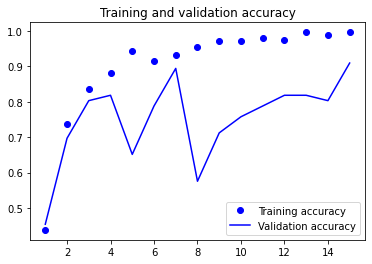

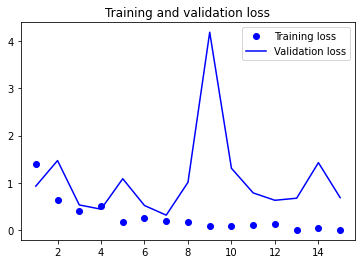

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


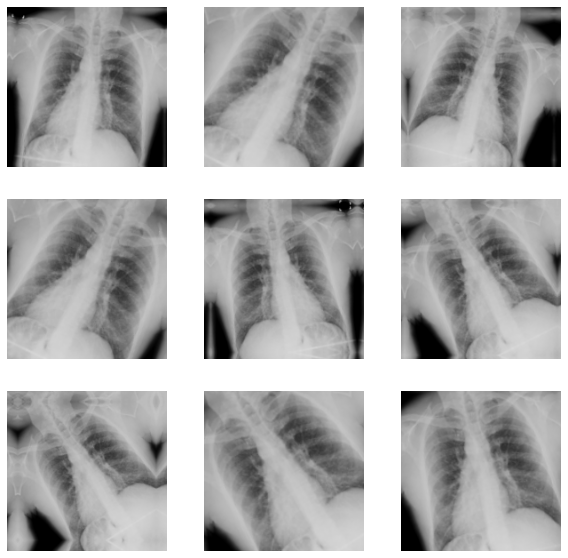

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(2):
 for i in range(9):

  augmented_images = data_augmentation(images)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[0].numpy().astype("uint8"))
  plt.axis("off")

#Defining a new convnet that includes image augmentation and dropout

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
                    optimizer="rmsprop",
                    metrics=["accuracy"])

In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augmentation.keras",
 save_best_only=True,monitor="val_loss")]


In [ ]:
history = model.fit(train_dataset, epochs=50,
                  validation_data=validation_dataset,
                  callbacks=callbacks)

Epoch 1/50
21/21 [==============================] - 9s 224ms/step - loss: 1.4278 - accuracy: 0.4098 - val_loss: 1.0749 - val_accuracy: 0.5000
Epoch 2/50
21/21 [==============================] - 4s 153ms/step - loss: 1.0857 - accuracy: 0.4877 - val_loss: 0.9460 - val_accuracy: 0.5000
Epoch 3/50
21/21 [==============================] - 4s 147ms/step - loss: 0.9306 - accuracy: 0.6434 - val_loss: 0.8106 - val_accuracy: 0.5909
Epoch 4/50
21/21 [==============================] - 4s 149ms/step - loss: 0.6861 - accuracy: 0.7172 - val_loss: 0.3647 - val_accuracy: 0.8030
Epoch 5/50
21/21 [==============================] - 4s 145ms/step - loss: 0.5241 - accuracy: 0.7582 - val_loss: 0.6356 - val_accuracy: 0.7727
Epoch 6/50
21/21 [==============================] - 4s 146ms/step - loss: 0.5771 - accuracy: 0.7869 - val_loss: 0.5239 - val_accuracy: 0.8333
Epoch 7/50
21/21 [==============================] - 4s 146ms/step - loss: 0.4685 - accuracy: 0.8197 - val_loss: 0.4890 - val_accuracy: 0.8333
Epoch 

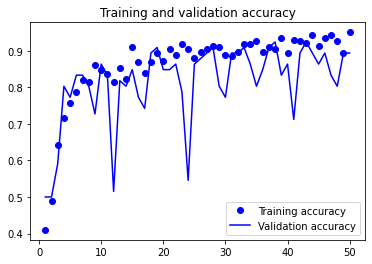

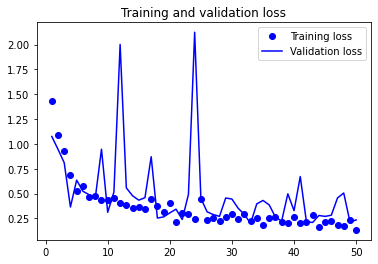

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()